In [66]:
# import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [68]:
warnings.filterwarnings('ignore')

In [2]:
# read data
data = pd.read_csv('children anemia.csv')

In [3]:
data.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [4]:
# display number of uique elements in the numeric columns in the dataframe
data.select_dtypes(exclude='number').nunique()

Age in 5-year groups                                                  7
Type of place of residence                                            2
Highest educational level                                             4
Wealth index combined                                                 5
Anemia level                                                          4
Have mosquito bed net for sleeping (from household questionnaire)     2
Smokes cigarettes                                                     2
Current marital status                                                6
Currently residing with husband/partner                               2
When child put to breast                                             41
Had fever in last two weeks                                           3
Anemia level.1                                                        4
Taking iron pills, sprinkles or syrup                                 3
dtype: int64

In [5]:
# drop duplicate rows
data_non = data.dropna(subset=['Anemia level']).drop_duplicates()

In [6]:
# fill all null values in the numerical data type category
data_non[data_non.select_dtypes('number').columns] = data_non.select_dtypes('number').apply(lambda x: x.fillna(round(np.mean(x),1)), axis=0)

In [7]:
data_non.isnull().sum()

Age in 5-year groups                                                        0
Type of place of residence                                                  0
Highest educational level                                                   0
Wealth index combined                                                       0
Births in last five years                                                   0
Age of respondent at 1st birth                                              0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)       0
Anemia level                                                                0
Have mosquito bed net for sleeping (from household questionnaire)           0
Smokes cigarettes                                                           0
Current marital status                                                      0
Currently residing with husband/partner                                   719
When child put to breast                                        

In [8]:
# data_non = data.dropna()

In [9]:
# forward and backward fill of other null values
data_non = data_non.ffill(limit=3).bfill(limit=3)

In [10]:
# check if any value is missing
data_non.isnull().sum()

Age in 5-year groups                                                     0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Births in last five years                                                0
Age of respondent at 1st birth                                           0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    0
Anemia level                                                             0
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Currently residing with husband/partner                                  0
When child put to breast                                                 0
Had fever in last two wee

In [11]:
# count values of all columns in the dataframe
for col in data_non.columns:
    display(data_non[col].value_counts())

Age in 5-year groups
25-29    3672
30-34    3008
20-24    2315
35-39    2238
40-44     888
15-19     525
45-49     366
Name: count, dtype: int64

Type of place of residence
Rural    8106
Urban    4906
Name: count, dtype: int64

Highest educational level
No education    5131
Secondary       4569
Primary         2181
Higher          1131
Name: count, dtype: int64

Wealth index combined
Middle     2870
Poorest    2727
Poorer     2680
Richer     2673
Richest    2062
Name: count, dtype: int64

Births in last five years
2    6750
1    4400
3    1694
4     163
6       5
Name: count, dtype: int64

Age of respondent at 1st birth
17    1470
18    1383
16    1359
20    1203
19    1155
15     938
21     905
22     745
23     633
24     558
14     435
25     412
26     353
27     294
28     200
13     195
29     175
30     156
12     125
31      99
32      71
34      42
33      36
36      18
35      15
37      11
39       8
38       8
41       4
40       2
45       2
43       1
42       1
Name: count, dtype: int64

Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)
113.0    397
116.0    372
112.0    368
108.0    363
111.0    359
        ... 
155.0      1
44.0       1
166.0      1
53.0       1
162.0      1
Name: count, Length: 123, dtype: int64

Anemia level
Not anemic    5295
Moderate      3927
Mild          3565
Severe         225
Name: count, dtype: int64

Have mosquito bed net for sleeping (from household questionnaire)
Yes    9038
No     3974
Name: count, dtype: int64

Smokes cigarettes
No     12983
Yes       29
Name: count, dtype: int64

Current marital status
Married                                11836
Living with partner                      457
Never in union                           278
Widowed                                  177
No longer living together/separated      140
Divorced                                 124
Name: count, dtype: int64

Currently residing with husband/partner
Living with her      11632
Staying elsewhere     1380
Name: count, dtype: int64

When child put to breast
Immediately    5999
Hours: 1       1778
102.0          1227
Days: 1        1043
103.0           702
202.0           407
104.0           374
105.0           312
106.0           225
203.0           217
108.0           147
107.0           105
110.0            79
112.0            69
109.0            64
111.0            37
204.0            34
113.0            27
114.0            26
207.0            23
205.0            17
214.0            14
123.0            13
115.0            12
118.0            10
119.0             9
117.0             7
120.0             6
206.0             6
116.0             5
121.0             4
211.0             3
122.0             3
210.0             3
220.0             2
212.0             1
208.0             1
223.0             1
Name: count, dtype: int64

Had fever in last two weeks
No            9578
Yes           3384
Don't know      50
Name: count, dtype: int64

Hemoglobin level adjusted for altitude (g/dl - 1 decimal)
101.3    2961
102.0     309
108.0     299
104.0     297
109.0     277
         ... 
162.0       1
37.0        1
29.0        1
165.0       1
145.0       1
Name: count, Length: 120, dtype: int64

Anemia level.1
Moderate      4997
Not anemic    4069
Mild          3520
Severe         425
Name: count, dtype: int64

Taking iron pills, sprinkles or syrup
No            10561
Yes            2382
Don't know       69
Name: count, dtype: int64

In [12]:
# drop column 'When child put to breast' because it is not labelled properly
data_non.drop(['When child put to breast','Anemia level.1'],axis= 1,inplace=True)

In [13]:
# rename and get the average of the age groups
data_non['Age in 5-year groups'] = data_non["Age in 5-year groups"].apply(lambda x:sum(map(int,x.split('-')))/2)
data_non.rename(columns= {'Age in 5-year groups':'Age average'}, inplace = True)

In [14]:
data_non.head()

,Age average,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),"Taking iron pills, sprinkles or syrup"
3,27.0,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,No,114.0,No
5,32.0,Urban,Higher,Richest,1,30,113.0,Mild,Yes,No,Married,Living with her,No,119.0,No
6,37.0,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Married,Living with her,No,102.0,Yes
7,37.0,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Married,Living with her,No,101.3,Yes
9,22.0,Urban,Secondary,Richest,1,19,108.0,Moderate,Yes,No,Married,Living with her,No,113.0,Yes


In [15]:
# reset dataframe index
data_non.reset_index(drop = True, inplace= True)

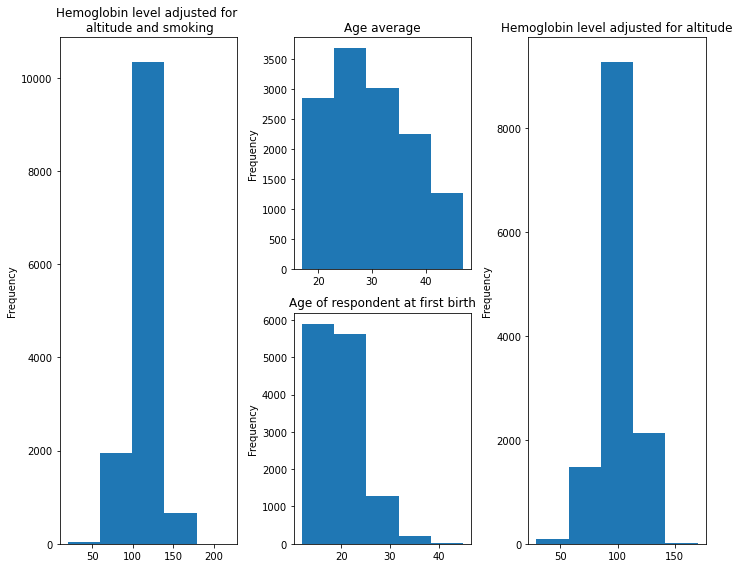

In [69]:
# selected histogram plots
fig,axes = plt.subplot_mosaic("""AABBCC
                                 AABBCC
                                 AADDCC
                                 AADDCC""",figsize=(10,8))
# axes = axes.flatten()

data_non['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].plot.hist(bins = 5,ax = axes['A'], title = f'Hemoglobin level adjusted for \n altitude and smoking')
data_non['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].plot.hist(bins = 5, ax = axes['C'], title = 'Hemoglobin level adjusted for altitude')
data_non['Age average'].plot.hist(bins=5, ax = axes['B'], title = 'Age average')
data_non['Age of respondent at 1st birth'].plot.hist(bins = 5, ax = axes['D'],title = "Age of respondent at first birth")
plt.tight_layout()

In [17]:
# check Anemia values proportion
data_non['Anemia level'].value_counts(normalize=True)

Anemia level
Not anemic    0.406932
Moderate      0.301798
Mild          0.273978
Severe        0.017292
Name: proportion, dtype: float64

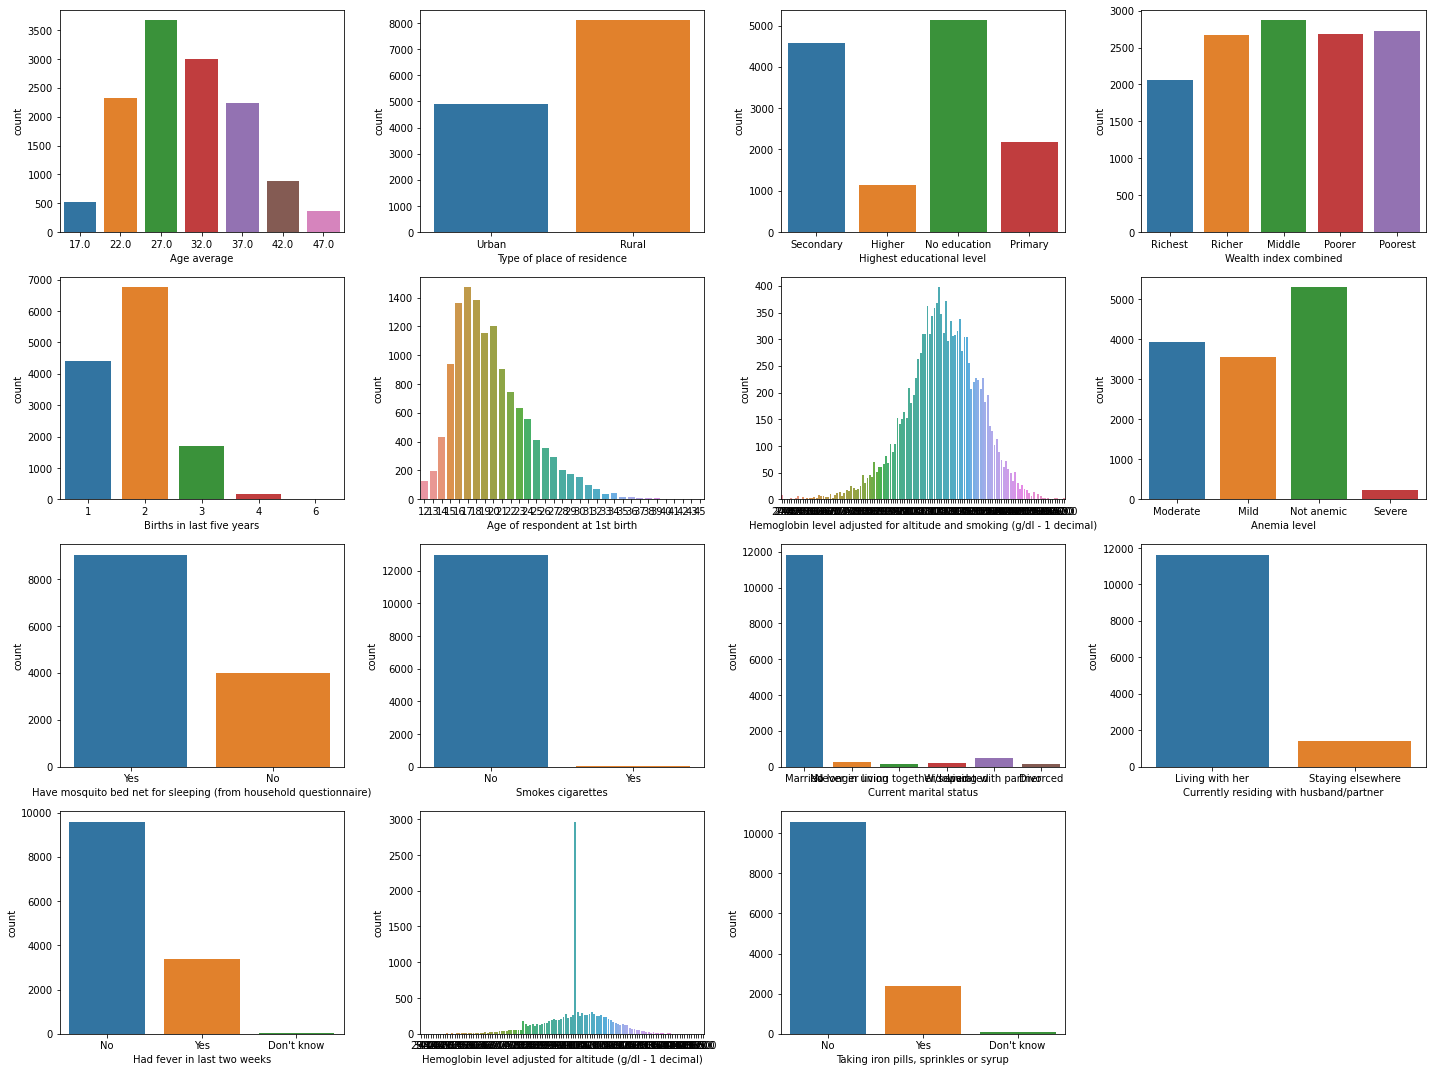

In [18]:
fig,axes = plt.subplots(4,4, figsize = (20,15))
axes = axes.flatten()
axes[-1].axis('off')
for col,ax in zip(data_non.columns,axes):
    sns.countplot(data_non, x = col, ax = ax)
    value_count = data_non[col].value_counts()
plt.tight_layout()

## MODEL I

In [34]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [20]:
le = LabelEncoder()
ss = StandardScaler()

In [21]:
# variables for data modelling
X = data_non.drop('Anemia level', axis = 1)
y = data_non['Anemia level']

In [22]:
# standardize the float data types in dataframe
X[X.filter(like = 'Hemoglobin').columns] = ss.fit_transform(X.filter(like = 'Hemoglobin'))

In [23]:
# label encode all categorical values
X[X.select_dtypes(exclude = 'number').columns.tolist()] = X.select_dtypes(exclude = 'number').apply(le.fit_transform)

In [24]:
# train and test splitting
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state = 12, stratify=y)

In [58]:
rfc = RandomForestClassifier(random_state=12,criterion='entropy')

In [50]:
rfc_grid.best_params_

{'criterion': 'entropy', 'n_estimators': 110}

In [59]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=12)

In [60]:
rfc.score(X_test,y_test)

0.9390368852459017

In [61]:
y_pred = rfc.predict(X_test)

In [62]:
cm = confusion_matrix(y_test,y_pred)

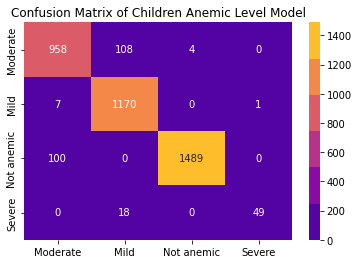

In [63]:
sns.heatmap(cm, annot = True,fmt = 'd',xticklabels= y.unique(), yticklabels= y.unique(), cmap=sns.color_palette("plasma"))
plt.title('Confusion Matrix of Children Anemic Level Model')
plt.show()

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Mild       0.90      0.90      0.90      1070
    Moderate       0.90      0.99      0.95      1178
  Not anemic       1.00      0.94      0.97      1589
      Severe       0.98      0.73      0.84        67

    accuracy                           0.94      3904
   macro avg       0.94      0.89      0.91      3904
weighted avg       0.94      0.94      0.94      3904

